<a href="https://colab.research.google.com/github/DODN-TINT/Ether/blob/master/Keras_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Keras (Hello World) Attempt
Learning Colab, TF 2.0 and Keras 
How easy and fast to recognize MNIST written digits

In [13]:
import tensorflow as tf

print("Tensorflow version = ", tf.__version__ )

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normalize images with 0..255 range as RGB values 
x_train, x_test = x_train / 255.0, x_test / 255.0

# data in 28x28 pixels but assume Flatten is to make each input 1x784
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)



Tensorflow version =  2.3.0
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2953 - accuracy: 0.9141
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1450 - accuracy: 0.9565
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1083 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0882 - accuracy: 0.9721
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9772


[0.07773727178573608, 0.9771999716758728]

Training Data  (60000, 28, 28)
Test Data   (10000, 28, 28)


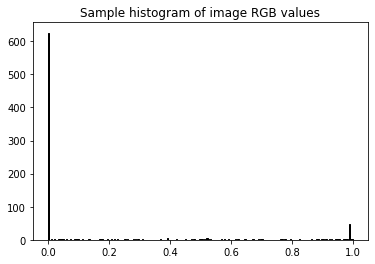

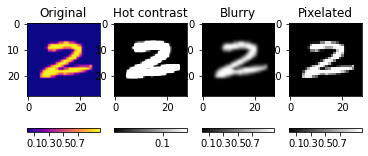

In [30]:
import matplotlib.pyplot as plt
import PIL.Image as pil

print("Training Data ", x_train.shape)
print("Test Data  ", x_test.shape)

# presentation technique to minimize pixelization  - 200th image sample
train_img = x_train[199,:,:]
plt.hist(train_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.title("Sample histogram of image RGB values")

fig = plt.figure()
ax = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(train_img, cmap="plasma")
ax.set_title('Original')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(train_img)
imgplot.set_clim(0.0, 0.15)
ax.set_title('Hot contrast')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

ax = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(train_img, interpolation="bicubic")
ax.set_title('Blurry')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

ax = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(train_img, interpolation="nearest", cmap="gray")
ax.set_title('Pixelated')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

# for t in range(20):
#   testimg = x_test[t,:,:]
#   plt.imshow(testimg)

Numpy v 1.18.5


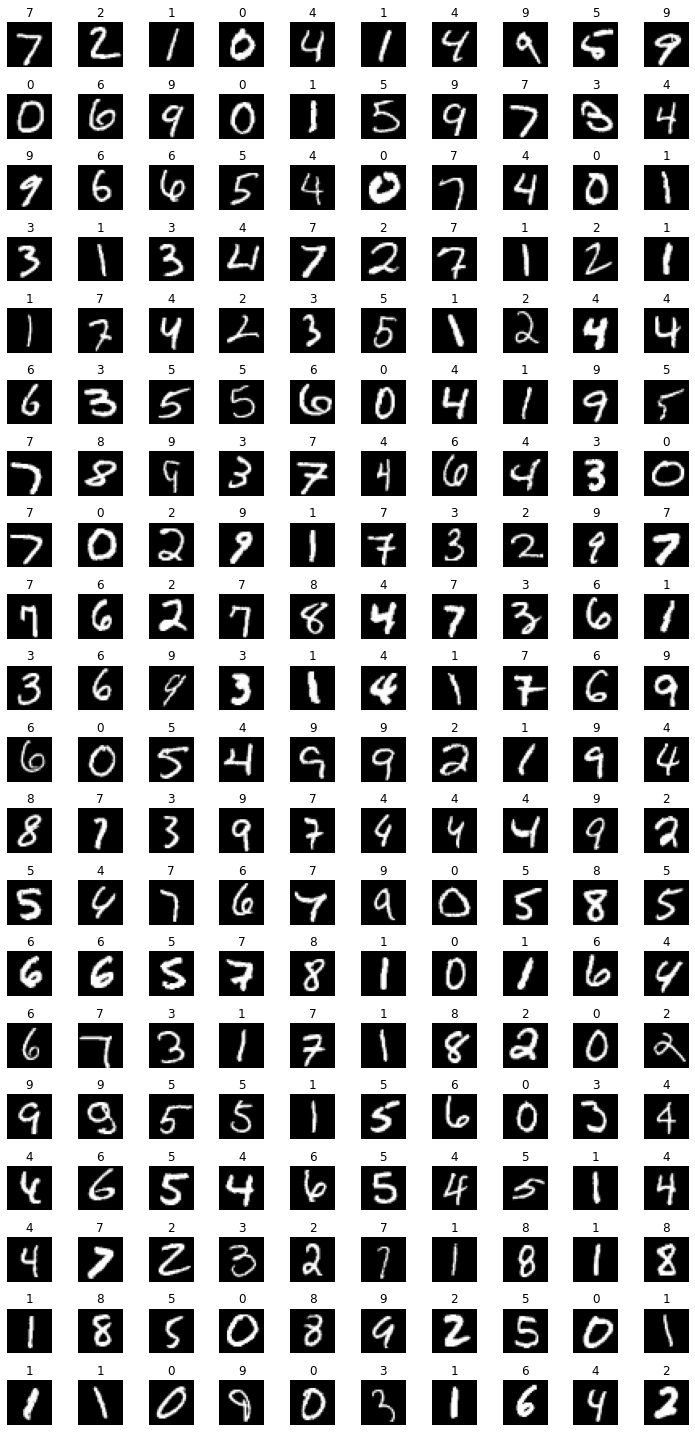

In [103]:
import numpy as np

print("Numpy v",np.__version__)


def show_images_nolabels(images, cols=1):
    n_images = len(images)
    rows = np.ceil(n_images/cols)
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(rows, cols, n + 1)
        plt.imshow(image)
        a.axis('off')

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None) or (titles == "default") or (len(images) == len(titles)))
    n_images = len(images)
    rows = np.ceil(n_images/cols)
    fig = plt.figure()
    if (titles is None):
       show_images_nolabels(images, cols)
    else:
       if titles == "default": titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
       for n, (image, title) in enumerate(zip(images, titles)):
          a = fig.add_subplot(rows, cols, n + 1)
          plt.imshow(image)
          a.set_title(title)
          a.axis('off')
    fig.set_size_inches(cols, rows)
    plt.tight_layout()
    plt.show()

ylabel= [str(i) for i in (y_test[0:200])]
# print(ylabel)
show_images(x_test[0:200,:,:], 10, ylabel)

